<a href="https://colab.research.google.com/github/carolyna-s/CS123A_Project/blob/main/CS123ATermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning & Analysis on OSDR-47 & OSDR-48 Datasets

Datasets Used:


https://osdr.nasa.gov/bio/repo/data/studies/OSD-47

https://osdr.nasa.gov/bio/repo/data/studies/OSD-48



# Read in methods

In [ ]:
!pip install import_ipynb
import import_ipynb

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt",force_remount=True)

Mounted at mnt


In [ ]:
m = __import__("mnt/MyDrive/Colab Notebooks/123A_Take2/projectmethods")
import seaborn as sns
import pandas as pd
# from itertools import zip_longest
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import re
import plotly.graph_objects as go
!pip install mygene
import mygene

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 202.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 170.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 200.9 MB/s eta 0:00:00
  Created wheel for pybiomart: filename=pybiomart-0.1-py3-none-any.whl size=14600 sha256=eec4e0ce3cb6ff8030ed3797c046a3bcbaff925d74dcbe5e830c6778d2d38b3a
  Stored in directory: /tmp/pip-ephem-wheel-cache-i7y6mmv3/wheels/ad/45/

# Reading in OSDR data

In [ ]:
#define dictionaries
data=dict()
metadata=dict()

Reading in Metadata

In [ ]:

#OSDR-47
metadata['47']=m.read_meta_data('47')

#OSDR-48
metadata['48']=m.read_meta_data('48')
metadata['48'].head()

Source Name                     Sample Name Characteristics[Organism]  \
0   RR1_BSL_M4   Mmus_C57-6J_LVR_BSL_C_Rep1_M4              Mus musculus   
1   RR1_BSL_M5   Mmus_C57-6J_LVR_BSL_C_Rep2_M5              Mus musculus   
2   RR1_BSL_M7   Mmus_C57-6J_LVR_BSL_C_Rep3_M7              Mus musculus   
3   RR1_BSL_M8   Mmus_C57-6J_LVR_BSL_C_Rep4_M8              Mus musculus   
4  RR1_BSL_M10  Mmus_C57-6J_LVR_BSL_C_Rep5_M10              Mus musculus   

  Term Source REF                              Term Accession Number  \
0       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
1       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
2       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
3       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
4       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   

  Characteristics[Strain] Term Source REF.1  \
0                C57BL/6J               EFO   
1                C57BL/6J               EFO   
2                C57BL/6J               EFO   
3                C57BL/6J               EFO   
4                C57BL/6J               EFO   

                Term Accession Number.1 Characteristics[Material Type]  \
0  http://www.ebi.ac.uk/efo/EFO_0000606                          Liver   
1  http://www.ebi.ac.uk/efo/EFO_0000606                          Liver   
2  http://www.ebi.ac.uk/efo/EFO_0000606                          Liver   
3  http://www.ebi.ac.uk/efo/EFO_0000606                          Liver   
4  http://www.ebi.ac.uk/efo/EFO_0000606                          Liver   

  Term Source REF.2  ... Parameter Value[exposure duration]          Unit.5  \
0              MESH  ...                                NaN  Not Applicable   
1              MESH  ...                                NaN  Not Applicable   
2              MESH  ...                                NaN  Not Applicable   
3              MESH  ...                                NaN  Not Applicable   
4              MESH  ...                                NaN  Not Applicable   

  Term Source REF.14 Term Accession Number.14  \
0                OSD   https://osdr.nasa.gov/   
1                OSD   https://osdr.nasa.gov/   
2                OSD   https://osdr.nasa.gov/   
3                OSD   https://osdr.nasa.gov/   
4                OSD   https://osdr.nasa.gov/   

  Parameter Value[ionizing radiation categorized by source]  \
0                                     Not Applicable          
1                                     Not Applicable          
2                                     Not Applicable          
3                                     Not Applicable          
4                                     Not Applicable          

  Term Source REF.15 Term Accession Number.15 Parameter Value[vehicle]  \
0                OSD   https://osdr.nasa.gov/           Not Applicable   
1                OSD   https://osdr.nasa.gov/           Not Applicable   
2                OSD   https://osdr.nasa.gov/           Not Applicable   
3                OSD   https://osdr.nasa.gov/           Not Applicable   
4                OSD   https://osdr.nasa.gov/           Not Applicable   

  Term Source REF.16                    Term Accession Number.16  
0               NCIT  http://purl.obolibrary.org/obo/NCIT_C48660  
1               NCIT  http://purl.obolibrary.org/obo/NCIT_C48660  
2               NCIT  http://purl.obolibrary.org/obo/NCIT_C48660  
3               NCIT  http://purl.obolibrary.org/obo/NCIT_C48660  
4               NCIT  http://purl.obolibrary.org/obo/NCIT_C48660  

[5 rows x 72 columns]

Getting Normalized Counts as a Dataframe

In [ ]:
data['47-normalized']=m.read_rnaseq_data('47_rna_seq_Normalized_Counts')
data['47-normalized'].tail()
#rows: gene exp values
#cols: mouse sample
data['48-normalized']=m.read_rnaseq_data('48_rna_seq_Normalized_Counts')
data['48-normalized'].tail()


Unnamed: 0  Mmus_C57-6J_LVR_GC_I_Rep1_M31  \
22191  ENSMUSG00000118353                      45.600972   
22192  ENSMUSG00000118366                    2391.935897   
22193  ENSMUSG00000118383                       9.949113   
22194  ENSMUSG00000118384                       2.487308   
22195  ENSMUSG00000118386                       0.000000   

       Mmus_C57-6J_LVR_GC_I_Rep2_M32  Mmus_C57-6J_LVR_FLT_I_Rep1_M21  \
22191                      69.347685                       66.541523   
22192                    2322.733457                     1498.010820   
22193                      35.791670                       79.620815   
22194                       0.000000                        0.000000   
22195                       0.000000                        1.137483   

       Mmus_C57-6J_LVR_FLT_I_Rep2_M22  Mmus_C57-6J_LVR_GC_C_Rep1_M36  \
22191                      129.599453                     121.333158   
22192                     1854.811554                    1801.150678   
22193                        6.220717                      10.601934   
22194                        1.036792                       0.000000   
22195                        3.110415                       1.177991   

       Mmus_C57-6J_LVR_GC_C_Rep2_M37  Mmus_C57-6J_LVR_GC_C_Rep3_M38  \
22191                     207.268147                     216.190100   
22192                    1916.382157                    1713.025492   
22193                       9.060909                       2.604702   
22194                       0.000000                       8.682336   
22195                       2.265224                       4.341164   

       Mmus_C57-6J_LVR_GC_C_Rep4_M39  Mmus_C57-6J_LVR_GC_C_Rep5_M40  \
22191                     203.586925                     159.630136   
22192                    2306.411567                    2099.440761   
22193                       0.000000                       9.092862   
22194                       0.929624                       4.041270   
22195                       4.648055                       0.000000   

       Mmus_C57-6J_LVR_FLT_C_Rep1_M25  Mmus_C57-6J_LVR_FLT_C_Rep2_M26  \
22191                      212.903516                      138.128991   
22192                     2156.654990                     1465.599890   
22193                        2.628466                        4.682435   
22194                        1.314224                        7.023561   
22195                        0.000000                        0.000000   

       Mmus_C57-6J_LVR_FLT_C_Rep3_M27  Mmus_C57-6J_LVR_FLT_C_Rep4_M28  \
22191                      184.792447                      176.055683   
22192                     2005.315842                     1889.948389   
22193                        5.961110                        5.302886   
22194                        2.384428                        4.242307   
22195                        0.000000                        2.121151   

       Mmus_C57-6J_LVR_FLT_C_Rep5_M30  
22191                      185.347476  
22192                     2318.810473  
22193                        3.888450  
22194                        0.000000  
22195                        6.480614

# Reading in Histology Oil Red Staining Data

In [ ]:
#OSDR-47:
data['ORO-47']=m.read_phenotype_data('47','LSDS-29_Histology_OSD_47_Histology_TRANSFORMED')
print("Number of samples: ",str(len(data['ORO-47']['Sample name'].unique())))
data['ORO-47']['Source name']=data["ORO-47"]["Source name"].str.replace(" ","")
data['ORO-47']

Number of samples:  15


Source name                  Sample name Space mission Spaceflight  \
0          GC2   Mmus_C57-6T_LVR_GC_Rep1_G2     CASIS-rr1      Ground   
1          GC3   Mmus_C57-6T_LVR_GC_Rep2_G3     CASIS-rr1      Ground   
2          GC5   Mmus_C57-6T_LVR_GC_Rep3_G5     CASIS-rr1      Ground   
3          GC1   Mmus_C57-6T_LVR_GC_Rep4_G1     CASIS-rr1      Ground   
4          GC4   Mmus_C57-6T_LVR_GC_Rep5_G4     CASIS-rr1      Ground   
5         FLT1  Mmus_C57-6T_LVR_FLT_Rep1_F1     CASIS-rr1      Flight   
6         FLT2  Mmus_C57-6T_LVR_FLT_Rep2_F2     CASIS-rr1      Flight   
7         FLT4  Mmus_C57-6T_LVR_FLT_Rep3_F4     CASIS-rr1      Flight   
8         FLT3  Mmus_C57-6T_LVR_FLT_Rep4_F3     CASIS-rr1      Flight   
9         FLT5  Mmus_C57-6T_LVR_FLT_Rep5_F5     CASIS-rr1      Flight   
10         BC1  Mmus_C57-6T_LVR_BSL_Rep1_B1     CASIS-rr1       Basal   
11         BC2  Mmus_C57-6T_LVR_BSL_Rep2_B2     CASIS-rr1       Basal   
12         BC3  Mmus_C57-6T_LVR_BSL_Rep3_B3     CASIS-rr1       Basal   
13         BC4  Mmus_C57-6T_LVR_BSL_Rep4_B4     CASIS-rr1       Basal   
14         BC5  Mmus_C57-6T_LVR_BSL_Rep5_B5     CASIS-rr1       Basal   

   Dissection     HE file ID  ORO Positivity (%)  
0   Immediate  G4 GL19-21 HE               14.49  
1   Immediate  G4 GL19-21 HE               13.96  
2   Immediate  G4 GL22-23 HE               17.35  
3   Immediate  G4 GL19-21 HE               12.02  
4   Immediate  G4 GL22-23 HE               16.34  
5   Immediate  G5 GL24-26 HE               23.56  
6   Immediate  G5 GL24-26 HE               25.56  
7   Immediate  G5 GL27-28 HE               16.28  
8   Immediate  G5 GL24-26 HE               20.57  
9   Immediate  G5 GL27-28 HE               17.43  
10  Immediate  G6 GL29-31 HE               23.80  
11  Immediate  G6 GL29-31 HE               19.79  
12  Immediate  G6 GL29-31 HE               17.44  
13  Immediate  G6 GL32-33 HE                2.06  
14  Immediate  G6 GL32-33 HE                4.23

In [ ]:
#OSDR-48:
data['ORO-48']=m.read_phenotype_data('48','LSDS-2_Histology_OSD_48_Histology_TRANSFORMED')
print("Number of samples: ",str(len(data['ORO-48']['Sample name'].unique())))
data['ORO-48']['Source name']=data["ORO-48"]["Source name"].str.replace("RR1_","")
data['ORO-48']['Source name']=data["ORO-48"]["Source name"].str.replace("_M","")
data['ORO-48']

Number of samples:  24


Source name                      Sample name Space mission Spaceflight  \
0         BSL4    Mmus_C57-6J_LVR_BSL_C_Rep1_M4           RR1       Basal   
1         BSL5    Mmus_C57-6J_LVR_BSL_C_Rep2_M5           RR1       Basal   
2         BSL7    Mmus_C57-6J_LVR_BSL_C_Rep3_M7           RR1       Basal   
3         BSL8    Mmus_C57-6J_LVR_BSL_C_Rep4_M8           RR1       Basal   
4        BSL10   Mmus_C57-6J_LVR_BSL_C_Rep5_M10           RR1       Basal   
5        VIV16   Mmus_C57-6J_LVR_VIV_C_Rep1_M16           RR1    Vivarium   
6        VIV17   Mmus_C57-6J_LVR_VIV_C_Rep2_M17           RR1    Vivarium   
7        VIV18   Mmus_C57-6J_LVR_VIV_C_Rep3_M18           RR1    Vivarium   
8        VIV19   Mmus_C57-6J_LVR_VIV_C_Rep4_M19           RR1    Vivarium   
9        VIV20   Mmus_C57-6J_LVR_VIV_C_Rep5_M20           RR1    Vivarium   
10        GC31    Mmus_C57-6J_LVR_GC_I_Rep1_M31           RR1      Ground   
11        GC32  \tMmus_C57-6J_LVR_GC_I_Rep2_M32           RR1      Ground   
12       FLT25   Mmus_C57-6J_LVR_FLT_C_Rep1_M25           RR1      Flight   
13       FLT26   Mmus_C57-6J_LVR_FLT_C_Rep2_M26           RR1      Flight   
14       FLT27   Mmus_C57-6J_LVR_FLT_C_Rep3_M27           RR1      Flight   
15       FLT28   Mmus_C57-6J_LVR_FLT_C_Rep4_M28           RR1      Flight   
16       FLT30   Mmus_C57-6J_LVR_FLT_C_Rep5_M30           RR1      Flight   
17       FLT21   Mmus_C57-6J_LVR_FLT_I_Rep1_M21           RR1      Flight   
18       FLT22   Mmus_C57-6J_LVR_FLT_I_Rep2_M22           RR1      Flight   
19        GC36    Mmus_C57-6J_LVR_GC_C_Rep1_M36           RR1      Ground   
20        GC37    Mmus_C57-6J_LVR_GC_C_Rep2_M37           RR1      Ground   
21        GC38    Mmus_C57-6J_LVR_GC_C_Rep3_M38           RR1      Ground   
22        GC39    Mmus_C57-6J_LVR_GC_C_Rep4_M39           RR1      Ground   
23        GC40    Mmus_C57-6J_LVR_GC_C_Rep5_M40           RR1      Ground   

         Dissection               HE file ID  ORO Positivity (%)  
0           Carcass     17-317.1 HE G1 1-2-3               10.41  
1           Carcass     17-317.1 HE G1 1-2-3               22.29  
2           Carcass     17-317.1 HE G1 1-2-3                2.09  
3           Carcass       17-317.1 HE G1 4-5                8.36  
4           Carcass       17-317.1 HE G1 4-5                3.30  
5           Carcass     17-317.1 HE G2 6-7-8               16.97  
6           Carcass     17-317.1 HE G2 6-7-8               14.98  
7           Carcass     17-317.1 HE G2 6-7-8               13.07  
8           Carcass      17-317.1 HE G2 9-10                1.44  
9           Carcass      17-317.1 HE G2 9-10                7.89  
10  Upon euthanasia     17-317.1 HE G6 23-24                1.34  
11  Upon euthanasia     17-317.1 HE G6 23-24                0.91  
12          Carcass  17-317.1 HE G4 16-17-18                7.11  
13          Carcass  17-317.1 HE G4 16-17-18                6.68  
14          Carcass  17-317.1 HE G4 16-17-18               13.45  
15          Carcass     17-317.1 HE G4 19-20               26.94  
16          Carcass     17-317.1 HE G4 19-20               23.72  
17  Upon euthanasia     17-317.1 HE G5 21-22               14.40  
18  Upon euthanasia     17-317.1 HE G5 21-22               24.70  
19          Carcass  17-317.1 HE G3 11-12-13                3.82  
20          Carcass  17-317.1 HE G3 11-12-13                4.79  
21          Carcass  17-317.1 HE G3 11-12-13               11.66  
22          Carcass     17-317.1 HE G3 14-15                5.35  
23          Carcass     17-317.1 HE G3 14-15               10.57

# Defining Condition Mapping Criteria
Basal and Vivarium samples mapped to Ground condition
Any sample excluded from normalized RNA-seq data table indicates that that sample was not used for RNA-sequencing.


In [ ]:

df=data['47-normalized']
dfT = df.T
dfT.columns=dfT.iloc[0]
dfT=dfT.iloc[1:]
dfT.columns.name=None
dfT = dfT.reset_index().rename(columns={"index":"sample"})         #from m.run_deseq2
m.samples_to_conditions(dfT,metadata['47'],'Factor Value[Spaceflight]','Ground Control','Space Flight','Basal Control')

['Mmus_C57-6T_LVR_BSL_Rep1_B1' 'Mmus_C57-6T_LVR_BSL_Rep2_B2'
 'Mmus_C57-6T_LVR_BSL_Rep3_B3' 'Mmus_C57-6T_LVR_BSL_Rep4_B4'
 'Mmus_C57-6T_LVR_BSL_Rep5_B5' 'Mmus_C57-6T_LVR_GC_Rep4_G1'
 'Mmus_C57-6T_LVR_GC_Rep1_G2' 'Mmus_C57-6T_LVR_GC_Rep2_G3'
 'Mmus_C57-6T_LVR_GC_Rep5_G4' 'Mmus_C57-6T_LVR_GC_Rep3_G5'
 'Mmus_C57-6T_LVR_FLT_Rep1_F1' 'Mmus_C57-6T_LVR_FLT_Rep2_F2'
 'Mmus_C57-6T_LVR_FLT_Rep4_F3' 'Mmus_C57-6T_LVR_FLT_Rep3_F4'
 'Mmus_C57-6T_LVR_FLT_Rep5_F5' 'Pool of CASIS BC_GC_FLT']


sample  condition
0  Mmus_C57-6T_LVR_BSL_Rep1_B1          0
1  Mmus_C57-6T_LVR_BSL_Rep2_B2          0
2  Mmus_C57-6T_LVR_BSL_Rep3_B3          0
3   Mmus_C57-6T_LVR_GC_Rep1_G2          0
4   Mmus_C57-6T_LVR_GC_Rep2_G3          0
5   Mmus_C57-6T_LVR_GC_Rep3_G5          0
6  Mmus_C57-6T_LVR_FLT_Rep1_F1          1
7  Mmus_C57-6T_LVR_FLT_Rep2_F2          1
8  Mmus_C57-6T_LVR_FLT_Rep3_F4          1

In [ ]:
#OSDR-48 MAP CONDITIONS

df=data['48-normalized']
dfT = df.T
dfT.columns=dfT.iloc[0]
dfT=dfT.iloc[1:]
dfT.columns.name=None
dfT = dfT.reset_index().rename(columns={"index":"sample"})         #from m.run_deseq2
m.samples_to_conditions(dfT,metadata['48'],'Factor Value[Spaceflight]','Ground Control','Space Flight','Basal Control','Vivarium Control')


['Mmus_C57-6J_LVR_BSL_C_Rep1_M4' 'Mmus_C57-6J_LVR_BSL_C_Rep2_M5'
 'Mmus_C57-6J_LVR_BSL_C_Rep3_M7' 'Mmus_C57-6J_LVR_BSL_C_Rep4_M8'
 'Mmus_C57-6J_LVR_BSL_C_Rep5_M10' 'Mmus_C57-6J_LVR_VIV_C_Rep1_M16'
 'Mmus_C57-6J_LVR_VIV_C_Rep2_M17' 'Mmus_C57-6J_LVR_VIV_C_Rep3_M18'
 'Mmus_C57-6J_LVR_VIV_C_Rep4_M19' 'Mmus_C57-6J_LVR_VIV_C_Rep5_M20'
 'Mmus_C57-6J_LVR_FLT_I_Rep1_M21' 'Mmus_C57-6J_LVR_FLT_I_Rep2_M22'
 'Mmus_C57-6J_LVR_FLT_C_Rep1_M25' 'Mmus_C57-6J_LVR_FLT_C_Rep2_M26'
 'Mmus_C57-6J_LVR_FLT_C_Rep3_M27' 'Mmus_C57-6J_LVR_FLT_C_Rep4_M28'
 'Mmus_C57-6J_LVR_FLT_C_Rep6_M29' 'Mmus_C57-6J_LVR_FLT_C_Rep5_M30'
 'Mmus_C57-6J_LVR_GC_I_Rep1_M31' 'Mmus_C57-6J_LVR_GC_I_Rep2_M32'
 'Mmus_C57-6J_LVR_GC_C_Rep6_M35' 'Mmus_C57-6J_LVR_GC_C_Rep1_M36'
 'Mmus_C57-6J_LVR_GC_C_Rep2_M37' 'Mmus_C57-6J_LVR_GC_C_Rep3_M38'
 'Mmus_C57-6J_LVR_GC_C_Rep4_M39' 'Mmus_C57-6J_LVR_GC_C_Rep5_M40'
 'RR1_GC_NASA+CASIS_LVR_POOL' 'RR1_GC_NASA_LVR_POOL'
 'RR1_BA_CASIS_LVR_POOL' 'RR1_FLT_NASA+CASIS_LVR_POOL'
 'RR1_FLT_NASA_LVR_POOL' 'RR1_BSL

sample  condition
0    Mmus_C57-6J_LVR_GC_I_Rep1_M31          0
1    Mmus_C57-6J_LVR_GC_I_Rep2_M32          0
2   Mmus_C57-6J_LVR_FLT_I_Rep1_M21          1
3   Mmus_C57-6J_LVR_FLT_I_Rep2_M22          1
4    Mmus_C57-6J_LVR_GC_C_Rep1_M36          0
5    Mmus_C57-6J_LVR_GC_C_Rep2_M37          0
6    Mmus_C57-6J_LVR_GC_C_Rep3_M38          0
7    Mmus_C57-6J_LVR_GC_C_Rep4_M39          0
8    Mmus_C57-6J_LVR_GC_C_Rep5_M40          0
9   Mmus_C57-6J_LVR_FLT_C_Rep1_M25          1
10  Mmus_C57-6J_LVR_FLT_C_Rep2_M26          1
11  Mmus_C57-6J_LVR_FLT_C_Rep3_M27          1
12  Mmus_C57-6J_LVR_FLT_C_Rep4_M28          1
13  Mmus_C57-6J_LVR_FLT_C_Rep5_M30          1

# Filtering Genes with DGEA

In [ ]:
rna_seq_47=m.filter_by_dgea(data['47-normalized'],metadata['47'],pval=0.05,l2fc=0)
print('rna_seq_47 data shape', rna_seq_47.shape)

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 24.54 seconds.

Fitting dispersion trend curve...
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 32.40 seconds.

Fitting LFCs...
... done in 15.79 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...


Log2 fold change & Wald test p-value: condition 0 vs 1
                        baseMean  log2FoldChange     lfcSE      stat  \
ENSMUSG00000000001   2647.889712       -0.003579  0.141372 -0.025314   
ENSMUSG00000000028     41.979262        0.318747  0.251090  1.269454   
ENSMUSG00000000031     31.374497       -0.401640  0.384983 -1.043267   
ENSMUSG00000000049  54010.994105       -0.061213  0.111358 -0.549700   
ENSMUSG00000000056   1577.044127       -0.287090  0.286038 -1.003681   
...                          ...             ...       ...       ...   
ENSMUSG00000118346    304.911145        0.025182  0.145998  0.172485   
ENSMUSG00000118353    153.895788       -0.020889  0.350203 -0.059649   
ENSMUSG00000118366   3126.113732       -0.104616  0.100654 -1.039364   
ENSMUSG00000118383      6.187960       -0.586585  1.034449 -0.567051   
ENSMUSG00000118386      2.319109        0.862256  1.289663  0.668590   

                      pvalue      padj  
ENSMUSG00000000001  0.979804  0.999994 

... done in 5.03 seconds.



In [ ]:
rna_seq_48=m.filter_by_dgea(data['48-normalized'],metadata['48'],pval=0.05,l2fc=0)
print('rna_seq_48 data shape', rna_seq_48.shape)

Fitting size factors...
... done in 0.03 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 30.26 seconds.

Fitting dispersion trend curve...
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 35.21 seconds.

Fitting LFCs...
... done in 20.97 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 988 outlier genes.

Fitting dispersions...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 0.90 seconds.

Fitting LFCs...
... done in 0.64 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition 0 vs 1
                        baseMean  log2FoldChange     lfcSE      stat  \
ENSMUSG00000000001   1684.650541       -0.005072  0.180909 -0.028038   
ENSMUSG00000000028     19.100214        0.374323  0.351912  1.063683   
ENSMUSG00000000031     19.119565        0.160855  0.443769  0.362475   
ENSMUSG00000000037      2.207952        0.093022  1.820465  0.051098   
ENSMUSG00000000049  47181.157649        0.062272  0.127950  0.486695   
...                          ...             ...       ...       ...   
ENSMUSG00000118353    150.122670       -0.096266  0.349092 -0.275761   
ENSMUSG00000118366   1970.577908        0.139133  0.132072  1.053460   
ENSMUSG00000118383      7.445572        1.250616  0.708094  1.766171   
ENSMUSG00000118384      2.063269       -0.104333  1.368020 -0.076266   
ENSMUSG00000118386      1.636523       -0.123877  1.332722 -0.092950   

                      pvalue      padj  
ENSMUSG00000000001  0.977632  0.998446 

... done in 7.61 seconds.



# Predict ORO% from RNA sequencing data
Note: Not all mice with ORO% measurements had their RNA sequenced.


In [ ]:
#OSDR-47 DGEA genes
rna_seq_47['Unnamed: 0']

11612    ENSMUSG00000048489
12826    ENSMUSG00000057137
Name: Unnamed: 0, dtype: object

In [ ]:
#OSDR-48 DGEA genes
rna_seq_48['Unnamed: 0']

960      ENSMUSG00000006777
1432     ENSMUSG00000015451
1662     ENSMUSG00000017830
1668     ENSMUSG00000017868
2077     ENSMUSG00000020108
                ...        
20655    ENSMUSG00000109141
20882    ENSMUSG00000110384
20893    ENSMUSG00000110439
21227    ENSMUSG00000112527
21776    ENSMUSG00000115708
Name: Unnamed: 0, Length: 86, dtype: object

Getting ORO% for

In [ ]:
#OSDR-47: oro for g/b/f
samples=list()
metadata['47']["Source Name"]=metadata['47']["Source Name"].str.replace("RR-1_","")
metadata['47']["Source Name"]=metadata['47']["Source Name"].str.replace("_M","")
for sample in rna_seq_47.columns[1:]:
  samples.append(metadata['47'][metadata['47']['Sample Name']==sample]['Source Name'].values[0])
samples_short=list()
for sample in samples:
  #print(sample)
  num=""
  for c in sample:   #each character
    #print(c)
    if c.isdigit():
      num+= str(c)
  if sample.startswith("G"):
      samples_short.append("GC" +num)
  elif sample.startswith("B"):
      samples_short.append("BC"+num)
  elif sample.startswith("F"):
      samples_short.append("FLT"+num)  #oro column is FLT, not F, so to compare, we gotta adj this
oro_subset_47=data['ORO-47'][data['ORO-47']['Source name'].isin(samples_short)]
oro_subset_47


Source name                  Sample name Space mission Spaceflight  \
0          GC2   Mmus_C57-6T_LVR_GC_Rep1_G2     CASIS-rr1      Ground   
1          GC3   Mmus_C57-6T_LVR_GC_Rep2_G3     CASIS-rr1      Ground   
2          GC5   Mmus_C57-6T_LVR_GC_Rep3_G5     CASIS-rr1      Ground   
5         FLT1  Mmus_C57-6T_LVR_FLT_Rep1_F1     CASIS-rr1      Flight   
6         FLT2  Mmus_C57-6T_LVR_FLT_Rep2_F2     CASIS-rr1      Flight   
7         FLT4  Mmus_C57-6T_LVR_FLT_Rep3_F4     CASIS-rr1      Flight   
10         BC1  Mmus_C57-6T_LVR_BSL_Rep1_B1     CASIS-rr1       Basal   
11         BC2  Mmus_C57-6T_LVR_BSL_Rep2_B2     CASIS-rr1       Basal   
12         BC3  Mmus_C57-6T_LVR_BSL_Rep3_B3     CASIS-rr1       Basal   

   Dissection     HE file ID  ORO Positivity (%)  
0   Immediate  G4 GL19-21 HE               14.49  
1   Immediate  G4 GL19-21 HE               13.96  
2   Immediate  G4 GL22-23 HE               17.35  
5   Immediate  G5 GL24-26 HE               23.56  
6   Immediate  G5 GL24-26 HE               25.56  
7   Immediate  G5 GL27-28 HE               16.28  
10  Immediate  G6 GL29-31 HE               23.80  
11  Immediate  G6 GL29-31 HE               19.79  
12  Immediate  G6 GL29-31 HE               17.44

In [ ]:
#OSDR-48
samples_48=list()
metadata['48']["Source Name"]=metadata['48']["Source Name"].str.replace("RR1_","")
metadata['48']["Source Name"]=metadata['48']["Source Name"].str.replace("_M","")
for sample in rna_seq_48.columns[1:]:
  samples_48.append(metadata['48'][metadata['48']['Sample Name']==sample]['Source Name'].values[0])
samples_short48=list()
for sample in samples_48:
  #print(sample)   no viv + basal bc they dont have rna seq data so theres no column for those

  num=""
  for c in sample:   #each character
    #print(c)
    if c.isdigit():
      num+= str(c)
  if sample.startswith("G"):
      samples_short48.append("GC" +num)
  elif sample.startswith("B"):
      samples_short48.append("BSL"+num)
  elif sample.startswith("V"):
      samples_short48.append("VIV"+num)
  elif sample.startswith("F"):
      samples_short48.append("FLT"+num)  #oro column is FLT, not F, so to compare, we gotta adj this
oro48_subset_48=data['ORO-48'][data['ORO-48']['Source name'].isin(samples_short48)]
oro48_subset_48

Source name                      Sample name Space mission Spaceflight  \
10        GC31    Mmus_C57-6J_LVR_GC_I_Rep1_M31           RR1      Ground   
11        GC32  \tMmus_C57-6J_LVR_GC_I_Rep2_M32           RR1      Ground   
12       FLT25   Mmus_C57-6J_LVR_FLT_C_Rep1_M25           RR1      Flight   
13       FLT26   Mmus_C57-6J_LVR_FLT_C_Rep2_M26           RR1      Flight   
14       FLT27   Mmus_C57-6J_LVR_FLT_C_Rep3_M27           RR1      Flight   
15       FLT28   Mmus_C57-6J_LVR_FLT_C_Rep4_M28           RR1      Flight   
16       FLT30   Mmus_C57-6J_LVR_FLT_C_Rep5_M30           RR1      Flight   
17       FLT21   Mmus_C57-6J_LVR_FLT_I_Rep1_M21           RR1      Flight   
18       FLT22   Mmus_C57-6J_LVR_FLT_I_Rep2_M22           RR1      Flight   
19        GC36    Mmus_C57-6J_LVR_GC_C_Rep1_M36           RR1      Ground   
20        GC37    Mmus_C57-6J_LVR_GC_C_Rep2_M37           RR1      Ground   
21        GC38    Mmus_C57-6J_LVR_GC_C_Rep3_M38           RR1      Ground   
22        GC39    Mmus_C57-6J_LVR_GC_C_Rep4_M39           RR1      Ground   
23        GC40    Mmus_C57-6J_LVR_GC_C_Rep5_M40           RR1      Ground   

         Dissection               HE file ID  ORO Positivity (%)  
10  Upon euthanasia     17-317.1 HE G6 23-24                1.34  
11  Upon euthanasia     17-317.1 HE G6 23-24                0.91  
12          Carcass  17-317.1 HE G4 16-17-18                7.11  
13          Carcass  17-317.1 HE G4 16-17-18                6.68  
14          Carcass  17-317.1 HE G4 16-17-18               13.45  
15          Carcass     17-317.1 HE G4 19-20               26.94  
16          Carcass     17-317.1 HE G4 19-20               23.72  
17  Upon euthanasia     17-317.1 HE G5 21-22               14.40  
18  Upon euthanasia     17-317.1 HE G5 21-22               24.70  
19          Carcass  17-317.1 HE G3 11-12-13                3.82  
20          Carcass  17-317.1 HE G3 11-12-13                4.79  
21          Carcass  17-317.1 HE G3 11-12-13               11.66  
22          Carcass     17-317.1 HE G3 14-15                5.35  
23          Carcass     17-317.1 HE G3 14-15               10.57

In [ ]:
#change column labels
rna_seq_47.columns = ["Unnamed: 0"] + list(oro_subset_47["Source name"])
rna_seq_47

Unnamed: 0         GC2         GC3         GC5         FLT1  \
11612  ENSMUSG00000048489  356.461492  502.341859  367.132691  1944.609117   
12826  ENSMUSG00000057137  399.002258  480.401854  427.042187   766.383873   

              FLT2         FLT4         BC1         BC2         BC3  
11612  1105.311759  1444.723905  746.309515  749.318473  721.012828  
12826   792.631370   768.128943  366.694347  551.972378  484.501624

In [ ]:
rna_seq_48.columns = ["Unnamed: 0"] + list(oro48_subset_48["Source name"])
rna_seq_48

Unnamed: 0           GC31          GC32          FLT25  \
960    ENSMUSG00000006777      31.505696    123.780200      20.474035   
1432   ENSMUSG00000015451     140.745347    159.613409     198.168740   
1662   ENSMUSG00000017830     330.389264    169.425181     487.618872   
1668   ENSMUSG00000017868    2108.137681   2257.186443    1241.652980   
2077   ENSMUSG00000020108     187.375718    173.739432     275.830362   
...                   ...            ...           ...            ...   
20655  ENSMUSG00000109141       2.487324      2.982694       7.393497   
20882  ENSMUSG00000110384       3.316419      0.745671       3.981099   
20893  ENSMUSG00000110439  110473.454067  50819.042944  167311.109975   
21227  ENSMUSG00000112527       3.721377     15.171645       2.083014   
21776  ENSMUSG00000115708     208.932881    243.832511     251.944823   

               FLT26         FLT27          FLT28          FLT30  \
960        68.428062    356.931703     163.096329      92.032780   
1432      233.042565     96.571131     209.241212     149.705152   
1662      299.732015    291.376402     218.351603     263.352963   
1668     1259.403842   2095.269138    1784.909024    1554.957318   
2077      269.564908    146.071067      62.293740     116.343332   
...              ...           ...            ...            ...   
20655       2.073591      4.711967       9.060903       1.736467   
20882      13.478314      1.177992       4.530452       0.000000   
20893  358938.191380  34913.325033  165978.762516  106677.235403   
21227       2.326780     23.558417       2.541813      28.601042   
21776     351.471707    367.533610     305.805597     217.058429   

              FLT21         FLT22           GC36           GC37  \
960       62.285057    126.289728      13.142292      21.070833   
1432     199.871473    124.419293     423.952491     401.049941   
1662     257.583189    187.447934     321.879848     900.295038   
1668    1780.933226   1644.621707     881.512974     511.421498   
2077     141.303524    139.423867    2176.365267     324.257199   
...             ...           ...            ...            ...   
20655      2.788863      9.092856      30.227055     177.929010   
20882      2.788869      3.030952      70.968019      78.429557   
20893  77727.556486  85565.802485  655438.887947  204439.677655   
21227     19.877838     23.952151       1.915084       4.118761   
21776    270.521399    287.940562     542.776127     516.234426   

                GC38           GC39           GC40  
960        26.228804      22.272116      42.772819  
1432      315.875904     296.921159     323.475418  
1662      474.922027     635.539661     320.072872  
1668     1048.985904     928.540770    1197.053600  
2077      466.157752     331.960599     364.217319  
...              ...            ...            ...  
20655      26.228616      31.817293      16.849777  
20882      82.262653      79.543244      29.811208  
20893  238559.052475  149517.954558  282634.575145  
21227       2.675560       2.338885       3.827928  
21776     439.928149     681.950927     836.013364  

[86 rows x 15 columns]

Create NumPy array of ORO% values that will be model target

In [ ]:
y_47=list()
for i in range(len(oro_subset_47)):
  oro_val=(oro_subset_47.iloc[i]["ORO Positivity (%)"])
  y_47.append(oro_val)                  #putting oro into list y
y_47=np.array(y_47)
y_47_classes =list()
for i in y_47:
  if i > y_47.mean():
    y_47_classes.append(1)
  else:
    y_47_classes.append(0)
y_47=y_47_classes

#creating numpy array X of rna-seq values... OSDR 47
X_47=m.transpose_df(rna_seq_47,"Unnamed: 0",'sample').drop(columns=["sample"])
X_47

ENSMUSG00000048489  ENSMUSG00000057137
0          356.461492          399.002258
1          502.341859          480.401854
2          367.132691          427.042187
3         1944.609117          766.383873
4         1105.311759          792.631370
5         1444.723905          768.128943
6          746.309515          366.694347
7          749.318473          551.972378
8          721.012828          484.501624

In [ ]:
y_48=list()
for i in range(len(oro48_subset_48)):
  oro_48_val=(oro48_subset_48.iloc[i]["ORO Positivity (%)"])
  y_48.append(oro_48_val)                  #putting oro into list y
y_48=np.array(y_48)
y_48_classes =list()
for i in y_48:
  if i > y_48.mean():
    y_48_classes.append(1)
  else:
    y_48_classes.append(0)
y_48=y_48_classes

#creating numpy array X of rna-seq values... OSDR 48
X_48=m.transpose_df(rna_seq_48,"Unnamed: 0",'sample').drop(columns=["sample"])
X_48

ENSMUSG00000006777  ENSMUSG00000015451  ENSMUSG00000017830  \
0            31.505696          140.745347          330.389264   
1           123.780200          159.613409          169.425181   
2            20.474035          198.168740          487.618872   
3            68.428062          233.042565          299.732015   
4           356.931703           96.571131          291.376402   
5           163.096329          209.241212          218.351603   
6            92.032780          149.705152          263.352963   
7            62.285057          199.871473          257.583189   
8           126.289728          124.419293          187.447934   
9            13.142292          423.952491          321.879848   
10           21.070833          401.049941          900.295038   
11           26.228804          315.875904          474.922027   
12           22.272116          296.921159          635.539661   
13           42.772819          323.475418          320.072872   

    ENSMUSG00000017868  ENSMUSG00000020108  ENSMUSG00000021215  \
0          2108.137681          187.375718         1412.734136   
1          2257.186443          173.739432         1728.707961   
2          1241.652980          275.830362         1564.889359   
3          1259.403842          269.564908         1797.491850   
4          2095.269138          146.071067         1791.950254   
5          1784.909024           62.293740         1202.280074   
6          1554.957318          116.343332         1228.770960   
7          1780.933226          141.303524         1472.785773   
8          1644.621707          139.423867         1167.292847   
9           881.512974         2176.365267         2054.616663   
10          511.421498          324.257199         2835.629873   
11         1048.985904          466.157752         2264.613945   
12          928.540770          331.960599         2547.398284   
13         1197.053600          364.217319         2157.909924   

    ENSMUSG00000021228  ENSMUSG00000021338  ENSMUSG00000022389  \
0          3334.789816           77.504230          859.593949   
1          4994.636378           44.884946         1012.732633   
2          1157.877796          222.057010          564.848330   
3          1845.087225          132.164334          789.756466   
4          1471.287706           44.921047         2518.806301   
5          5943.201760          116.331313         6461.320739   
6          2328.783837          114.877397         3759.710910   
7          2723.238562           63.384727         3888.762529   
8          4373.521484           75.504515         6938.486453   
9           187.122073          540.007354         1325.223229   
10          376.059116          162.682304          452.840324   
11          593.460182          138.334132         1150.720306   
12          504.039584          124.060348         1231.021114   
13         1241.446691          101.205590         1814.076961   

    ENSMUSG00000022505  ...  ENSMUSG00000082363  ENSMUSG00000097316  \
0           383.429722  ...            5.803839           63.277238   
1           556.826931  ...            2.237053           37.350912   
2           323.930265  ...           21.612071           23.045072   
3           313.736412  ...           39.398492           20.165539   
4           520.378249  ...            2.355982           38.925496   
5           403.620460  ...            3.397837           60.551173   
6           361.813621  ...            3.472932           35.366695   
7           577.212009  ...            4.648068           19.588133   
8           308.460342  ...            7.072218           73.796906   
9           271.402841  ...           56.511000           12.780946   
10          244.906398  ...            3.511703           23.732245   
11          265.824118  ...            9.537603           30.157972   
12          263.290592  ...            3.181728           17.484396   
13          345.971295  ...          

In [ ]:
#split training and testing data... OSDR 47
X_47_train,X_47_test,y_47_train,y_47_test=m.train_test_split(X_47,y_47,test_size=0.3,random_state=42)
print('X train: ', X_47_train.shape)
print('y train: ', len(y_47_train))      #4 samples used for train
print('X test: ', X_47_test.shape)
print('y test: ', len(y_47_test))      #2 samples used for test

X train:  (6, 2)
y train:  6
X test:  (3, 2)
y test:  3


In [ ]:
#split training and testing data... OSDR 48
X_48_train,X_48_test,y_48_train,y_48_test=m.train_test_split(X_48,y_48,test_size=0.25,random_state=42)
print('y train: ', len(y_48_train))      #10 samples used for train
print('X test: ', X_48_test.shape)
print('y test: ', len(y_48_test))      #4 samples used for test

X train:  (10, 86)
y train:  10
X test:  (4, 86)
y test:  4


Random Forest
train accuracy: 1.0
test accuracy: 0.3333333333333333


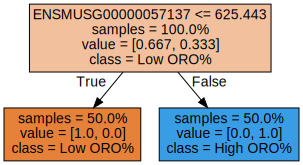

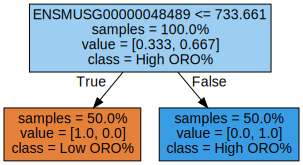

Logistic regression: 
train accuracy: 1.0
test accuracy: 0.3333333333333333


In [ ]:
#make random forest...47 dataset
max_depth=4
clf=m.RandomForestClassifier(max_depth=max_depth,random_state=42)
clf.fit(X_47_train,y_47_train)

y_train_pred_47 = clf.predict(X_47_train)
train_acc_47 = m.accuracy_score(y_47_train, y_train_pred_47)
print("Random Forest")
print("train accuracy:", train_acc_47)

y_pred_47 = clf.predict(X_47_test)
accuracy = m.accuracy_score(y_47_test, y_pred_47)
print("test accuracy:", accuracy)
num_trees=2
for i in range(num_trees):
    tree = clf.estimators_[i]
    dot_data = m.export_graphviz(tree,
                               feature_names=X_47_train.columns,
                               class_names=['Low ORO%',"High ORO%"],
                               filled=True,
                               impurity=False,
                               proportion=True)
    graph = m.graphviz.Source(dot_data)
    display(graph)

#Logistic regression:
print("Logistic regression: ")
clf = m.LogisticRegression(random_state=2)
clf.fit(X_47_train, y_47_train)

y_train_pred = clf.predict(X_47_train)
train_acc = m.accuracy_score(y_47_train, y_train_pred)
print("train accuracy:", train_acc)

y_pred = clf.predict(X_47_test)
accuracy = m.accuracy_score(y_47_test, y_pred)
print("test accuracy:", accuracy)

# confusion_matrix(y_47_test,y_pred)

Random Forest
train accuracy: 1.0
test accuracy: 0.75


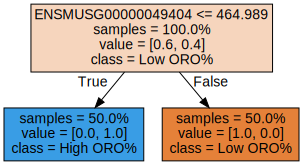

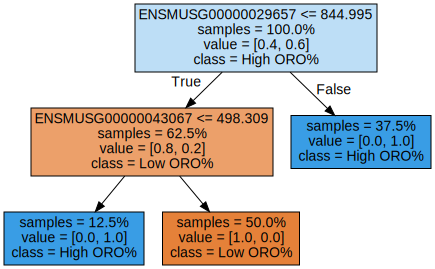

Logistic regression: 
train accuracy: 1.0
test accuracy: 0.75


In [ ]:
#make random forest... 48 dataset
max_depth=4
clf=m.RandomForestClassifier(max_depth=max_depth,random_state=23)
clf.fit(X_48_train,y_48_train)

y_train_pred = clf.predict(X_48_train)
train_acc = m.accuracy_score(y_48_train, y_train_pred)
print("Random Forest")
print("train accuracy:", train_acc)

y_pred = clf.predict(X_48_test)
accuracy = m.accuracy_score(y_48_test, y_pred)
print("test accuracy:", accuracy)
num_trees=2
for i in range(num_trees):
    tree = clf.estimators_[i]
    dot_data = m.export_graphviz(tree,
                               feature_names=X_48_train.columns,
                               class_names=['Low ORO%',"High ORO%"],
                               filled=True,
                               impurity=False,
                               proportion=True)
    graph = m.graphviz.Source(dot_data)
    display(graph)


#Logistic regression:
print("Logistic regression: ")
clf = m.LogisticRegression(random_state=23)
clf.fit(X_48_train, y_48_train)

y_train_pred = clf.predict(X_48_train)
train_acc = m.accuracy_score(y_48_train, y_train_pred)
print("train accuracy:", train_acc)

y_pred = clf.predict(X_48_test)
accuracy = m.accuracy_score(y_48_test, y_pred)
print("test accuracy:", accuracy)




# Hypothesis Testing & Applying Methods for Visualization :

Hypothesis Testing (at a 95% level of significance):

Null Hypothesis: There is no difference in ORO% between Spaceflight and Ground Samples
* H0:μ(Flight Sample ORO%) = μ(Nonflight Sample ORO%)

Alternative Hypothesis: There IS a difference in ORO% between Spaceflight and Ground Samples
* HA: μ(Flight Sample ORO%) ≠ μ(Nonflight Sample ORO%)


Test used: 2-sample independent t-test
Samples are of different sizes, unequal variance assumed

Viewing ORO% of Flight and All Nonflight Samples using Boxplots

OSDR-47 data:
Observed field:  ORO Positivity (%)
Excluding Samples:  []
n flight =  5
n nonflight =  10
P-Value:  0.03433
OSDR-48 data:
Observed field:  ORO Positivity (%)
Excluding Samples:  []
n flight =  7
n nonflight =  17
P-Value:  0.03921


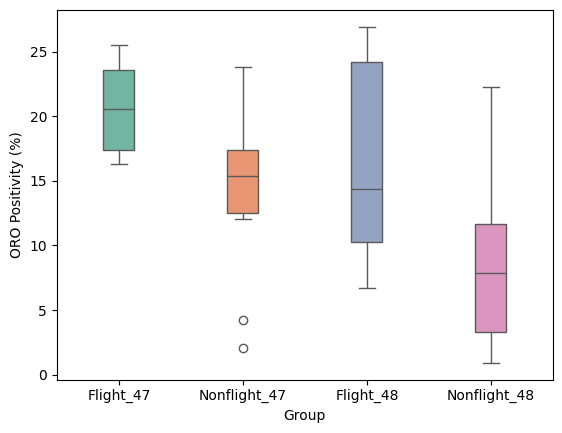

In [ ]:
print("OSDR-47 data:")
df_47box=m.plotbox_summary(source=data['ORO-47'],sample_key='Spaceflight',field='ORO Positivity (%)',treatment='Spaceflight',space='Flight',exclude_samples=[])
df_47box
boxplot47=pd.DataFrame(df_47box,columns=["Flight_47","Nonflight_47"])
boxplot47

####
print("OSDR-48 data:")
df_48box=m.plotbox_summary(source=data['ORO-48'],sample_key='Spaceflight',field='ORO Positivity (%)',treatment='Spaceflight',space='Flight',exclude_samples=[])
df_48box
boxplot48=pd.DataFrame(df_48box,columns=["Flight_48","Nonflight_48"])
boxplot48
###
df_toplot48=boxplot48.melt(var_name="Group",value_name="ORO Positivity (%)")
df_toplot48
###
df_toplot47=boxplot47.melt(var_name="Group",value_name="ORO Positivity (%)")
df_toplot47
###
df_toplot=pd.concat([df_toplot47,df_toplot48])
df_toplot=df_toplot.reset_index(drop=True)
df_toplot
ax=sns.boxplot(data=df_toplot,x="Group",y="ORO Positivity (%)",palette="Set2",width=0.25)


Viewing ORO% Between Flight & Ground Control Samples Through Boxplots

OSDR-47 Samples Data:
Observed field:  ORO Positivity (%)
Excluding Samples:  ['Basal']
n flight =  5
n nonflight =  5
P-Value:  0.02574
OSDR-48 Samples data:
Observed field:  ORO Positivity (%)
Excluding Samples:  ['Basal', 'Vivarium']
n flight =  7
n nonflight =  7
P-Value:  0.012


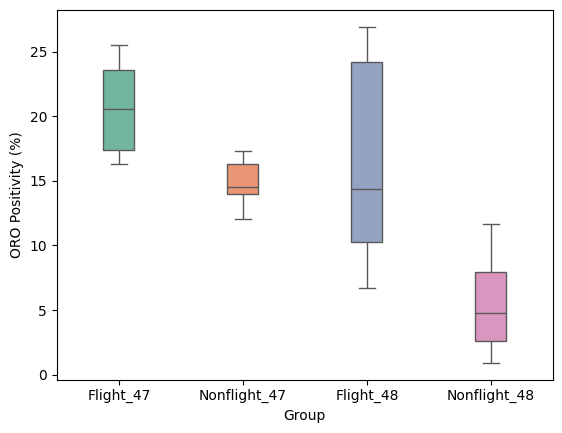

In [ ]:
print("OSDR-47 Samples Data:")
df_47box=m.plotbox_summary(source=data['ORO-47'],sample_key='Spaceflight',field='ORO Positivity (%)',treatment='Spaceflight',space='Flight',exclude_samples=['Basal'])
df_47box
boxplot47=pd.DataFrame(df_47box,columns=["Flight_47","Nonflight_47"])
boxplot47

####
print( "OSDR-48 Samples data:")
df_48box=m.plotbox_summary(source=data['ORO-48'],sample_key='Spaceflight',field='ORO Positivity (%)',treatment='Spaceflight',space='Flight',exclude_samples=['Basal','Vivarium'])
df_48box
boxplot48=pd.DataFrame(df_48box,columns=["Flight_48","Nonflight_48"])
boxplot48
###
df_toplot48=boxplot48.melt(var_name="Group",value_name="ORO Positivity (%)")
df_toplot48
###
df_toplot47=boxplot47.melt(var_name="Group",value_name="ORO Positivity (%)")
df_toplot47
###
df_toplot=pd.concat([df_toplot47,df_toplot48])
df_toplot=df_toplot.reset_index(drop=True)
df_toplot
ax=sns.boxplot(data=df_toplot,x="Group",y="ORO Positivity (%)",palette="Set2",width=0.25)

At a 95% level of significance, we reject the null hypothesis if the p-value < 0.05

After conducting 2-sample independent t-tests, between Flight and ground samples for both OSDR-47 and OSDR-48 flight/nonflight samples, each time we get a p-value < 0.05.

* OSD-47 Flight/NonFlight P-value: 0.03433   < 0.05
* OSD-48 Flight/NonFlight P-value: 0.03921  < 0.05
* OSD-47 Flight/Ground Control P-val: 0.02574    < 0.05
* OSD-48 Flight/Ground Control P-val: 0.012    < 0.05


 We can thus conclude that there is evidence to suggest that there is a significant difference in ORO% between flight and nonflight samples.

This is an indicator that spaceflight affects mice and causes increased level of lipids to be stored in the liver. Mice are studied due to their genomic similarity with humans. The increase in lipid storage in the liver is a concern that must be considered when sending astronauts into space. Increased lipid storage in the liver may cause a variety of problems, like Non-alcoholic fatty liver disease, which may cause liver damage and a variety of issues, including changes in metabolism.


# Volcano plots!

In [ ]:
test47=m.dgea_table(data['47-normalized'],metadata['47'],pval=0.05,l2fc=0)
test47=test47.reset_index()
test47

Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 25.45 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 34.94 seconds.

Fitting LFCs...
... done in 15.39 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.66 seconds.



Log2 fold change & Wald test p-value: condition 0 vs 1
                        baseMean  log2FoldChange     lfcSE      stat  \
ENSMUSG00000000001   2647.889712       -0.003579  0.141372 -0.025314   
ENSMUSG00000000028     41.979262        0.318747  0.251090  1.269454   
ENSMUSG00000000031     31.374497       -0.401640  0.384983 -1.043267   
ENSMUSG00000000049  54010.994105       -0.061213  0.111358 -0.549700   
ENSMUSG00000000056   1577.044127       -0.287090  0.286038 -1.003681   
...                          ...             ...       ...       ...   
ENSMUSG00000118346    304.911145        0.025182  0.145998  0.172485   
ENSMUSG00000118353    153.895788       -0.020889  0.350203 -0.059649   
ENSMUSG00000118366   3126.113732       -0.104616  0.100654 -1.039364   
ENSMUSG00000118383      6.187960       -0.586585  1.034449 -0.567051   
ENSMUSG00000118386      2.319109        0.862256  1.289663  0.668590   

                      pvalue      padj  
ENSMUSG00000000001  0.979804  0.999994 

index      baseMean  log2FoldChange     lfcSE      stat  \
0      ENSMUSG00000000001   2647.889712       -0.003579  0.141372 -0.025314   
1      ENSMUSG00000000028     41.979262        0.318747  0.251090  1.269454   
2      ENSMUSG00000000031     31.374497       -0.401640  0.384983 -1.043267   
3      ENSMUSG00000000049  54010.994105       -0.061213  0.111358 -0.549700   
4      ENSMUSG00000000056   1577.044127       -0.287090  0.286038 -1.003681   
...                   ...           ...             ...       ...       ...   
20488  ENSMUSG00000118346    304.911145        0.025182  0.145998  0.172485   
20489  ENSMUSG00000118353    153.895788       -0.020889  0.350203 -0.059649   
20490  ENSMUSG00000118366   3126.113732       -0.104616  0.100654 -1.039364   
20491  ENSMUSG00000118383      6.187960       -0.586585  1.034449 -0.567051   
20492  ENSMUSG00000118386      2.319109        0.862256  1.289663  0.668590   

         pvalue      padj  
0      0.979804  0.999994  
1      0.204279  0.999994  
2      0.296825  0.999994  
3      0.582525  0.999994  
4      0.315532  0.999994  
...         ...       ...  
20488  0.863056  0.999994  
20489  0.952435  0.999994  
20490  0.298636  0.999994  
20491  0.570680  0.999994  
20492  0.503757  0.999994  

[20493 rows x 7 columns]

In [ ]:
test48=m.dgea_table(data['48-normalized'],metadata['48'],pval=0.05,l2fc=0)
test48=test48.reset_index()
test48

Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 28.33 seconds.

Fitting dispersion trend curve...
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 37.43 seconds.

Fitting LFCs...
... done in 18.61 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 988 outlier genes.

Fitting dispersions...
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 0.80 seconds.

Fitting LFCs...
... done in 0.62 seconds.

Running Wald tests...
... done in 7.40 seconds.



Log2 fold change & Wald test p-value: condition 0 vs 1
                        baseMean  log2FoldChange     lfcSE      stat  \
ENSMUSG00000000001   1684.650541       -0.005072  0.180909 -0.028038   
ENSMUSG00000000028     19.100214        0.374323  0.351912  1.063683   
ENSMUSG00000000031     19.119565        0.160855  0.443769  0.362475   
ENSMUSG00000000037      2.207952        0.093022  1.820465  0.051098   
ENSMUSG00000000049  47181.157649        0.062272  0.127950  0.486695   
...                          ...             ...       ...       ...   
ENSMUSG00000118353    150.122670       -0.096266  0.349092 -0.275761   
ENSMUSG00000118366   1970.577908        0.139133  0.132072  1.053460   
ENSMUSG00000118383      7.445572        1.250616  0.708094  1.766171   
ENSMUSG00000118384      2.063269       -0.104333  1.368020 -0.076266   
ENSMUSG00000118386      1.636523       -0.123877  1.332722 -0.092950   

                      pvalue      padj  
ENSMUSG00000000001  0.977632  0.998446 

index      baseMean  log2FoldChange     lfcSE      stat  \
0      ENSMUSG00000000001   1684.650541       -0.005072  0.180909 -0.028038   
1      ENSMUSG00000000028     19.100214        0.374323  0.351912  1.063683   
2      ENSMUSG00000000031     19.119565        0.160855  0.443769  0.362475   
3      ENSMUSG00000000037      2.207952        0.093022  1.820465  0.051098   
4      ENSMUSG00000000049  47181.157649        0.062272  0.127950  0.486695   
...                   ...           ...             ...       ...       ...   
22191  ENSMUSG00000118353    150.122670       -0.096266  0.349092 -0.275761   
22192  ENSMUSG00000118366   1970.577908        0.139133  0.132072  1.053460   
22193  ENSMUSG00000118383      7.445572        1.250616  0.708094  1.766171   
22194  ENSMUSG00000118384      2.063269       -0.104333  1.368020 -0.076266   
22195  ENSMUSG00000118386      1.636523       -0.123877  1.332722 -0.092950   

         pvalue      padj  
0      0.977632  0.998446  
1      0.287472  0.998377  
2      0.716997  0.998377  
3      0.959247       NaN  
4      0.626475  0.998377  
...         ...       ...  
22191  0.782732  0.998377  
22192  0.292130  0.998377  
22193  0.077367  0.804112  
22194  0.939208       NaN  
22195  0.925943       NaN  

[22196 rows x 7 columns]

In [ ]:
vol_47=data['47-normalized']
foldchanges47=list(test47['log2FoldChange'])
transformed_pvals47=list(-1*np.log10(test47['pvalue']))
plot_title="Gene Expression in Nonflight vs. Flight Samples in OSDR-47"
x_axis_title="log2(fold change)"
y_axis_title="-log10(p-value)"
x_axis="log2(fold change)"
y_axis="-log10(p-value)"
point_radius=6
fig_47=go.Figure()
fig_47.update_layout(
    title=plot_title,
    xaxis_title=x_axis,
    yaxis_title=y_axis,
    paper_bgcolor='white',
    plot_bgcolor='white'
)
colors_47=[]
expressed_47=[]
for i in range(0,len(foldchanges47)):
  if transformed_pvals47[i]>2:
    if foldchanges47[i]>0.5:
      colors_47.append('darkred')
      expressed_47.append(vol_47['Unnamed: 0'][i])
    elif foldchanges47[i]<-0.5:
      colors_47.append('navy')
      expressed_47.append(vol_47['Unnamed: 0'][i])
    else:
      colors_47.append('grey')
  else:
    colors_47.append('lightgrey')
fig_47.add_trace(
    go.Scattergl(
        x=foldchanges47,y=transformed_pvals47,mode='markers',text=vol_47.iloc[:,0].values.tolist(),
        hovertemplate='%{text}: %{x} (fc)<br>%{y}(p-val)<extra></extra>',showlegend=False,
        marker={'color':colors_47,'size':point_radius},marker_opacity=0.7
    )
)
#fig_47.show()
print("Expressed count: ",len(expressed_47))
dgeaexpressed_47=rna_seq_47['Unnamed: 0']
overlap=set(expressed_47) & set(dgeaexpressed_47)
print("Overlap: ",len(overlap))
print(overlap)

most_exp_47=(test47[test47.iloc[:,0].isin(overlap)]).sort_values(by='padj')
most_exp_15_47=most_exp_47.head(15)
print(most_exp_15_47['index'])



top_15_x_47=most_exp_15_47['log2FoldChange']
top_15_y_47=-np.log10(most_exp_15_47['pvalue'])
top_15_text_47=most_exp_15_47['index']
top15_cols_47=[]
for fold in top_15_x_47:

  if fold>0:
      top15_cols_47.append('darkred')
  elif fold<0:
      top15_cols_47.append('navy')
fig_47.add_traces(
    go.Scattergl(x=top_15_x_47,y=top_15_y_47,text=top_15_text_47,marker_symbol='star',marker_size=10,mode='markers',marker_opacity=1, marker={'color':top15_cols_47},showlegend=False))
fig_47.update_layout(
 annotations=[
      dict(x=1.0,y=1.25,xref='paper',yref='paper',text="Legend:",align="left",font=dict(color="black"),showarrow=False),
      dict(x=.95,y=1.12,xref='paper',yref='paper',text="•",align="left",font=dict(color="navy"),showarrow=False),
      dict(x=.95,y=1.17,xref='paper',yref='paper',text="•",align="left",font=dict(color="darkred"),showarrow=False),

      dict(x=1.05,y=1.12,xref='paper',yref='paper',text="Underexpressed",align="left",font=dict(color="navy"),showarrow=False),
      dict(x=1.044,y=1.17,xref='paper',yref='paper',text="Overexpressed",align="left",font=dict(color="darkred"),showarrow=False)

     ]   )
fig_47.show()

fc=np.array(foldchanges47)
pval = np.array(transformed_pvals47)

sig_up = np.sum((pval > 2) & (fc > 0.5))
sig_down = np.sum((pval > 2) & (fc < -0.5))
sig_neutral = np.sum((pval > 2) & (np.abs(fc) <= 0.5))
non_sig = np.sum(pval <= 2)

print(f"Significant upregulated (red): {sig_up}")
print(f"Significant downregulated (blue): {sig_down}")
print(f"Significant w low fc (grey): {sig_neutral}")
print(f"insignificant (light grey): {non_sig}")

Expressed count:  124
Overlap:  2
{'ENSMUSG00000057137', 'ENSMUSG00000048489'}
12826    ENSMUSG00000057137
11612    ENSMUSG00000048489
Name: index, dtype: object


Significant upregulated (red): 89
Significant downregulated (blue): 35
Significant w low fc (grey): 54
insignificant (light grey): 20244


In [ ]:
voldf=data['48-normalized']
foldchanges1=list(test48['log2FoldChange'])
transformed_pvals1=-np.log10(test48['pvalue'])
plot_title="Gene Expression in Nonflight vs. Flight Samples in OSDR-48"
x_axis_title="log2(fold change)"
y_axis_title="-log10(p-value)"
point_radius=6
fig=go.Figure()
fig.update_layout(
    title=plot_title,
    xaxis_title=x_axis_title,
    yaxis_title=y_axis_title,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

colors=[]
expressed=[]
for i in range(0,len(foldchanges1)):
  if transformed_pvals1[i]>2:
    if foldchanges1[i]>0.5:
      colors.append('red')
      expressed.append(voldf['Unnamed: 0'][i])
    elif foldchanges1[i]<-0.5:
      colors.append('blue')
      expressed.append(voldf['Unnamed: 0'][i])
    else:
      colors.append('grey')
  else:
    colors.append('lightgrey')

fig.add_trace(
    go.Scattergl(
        x=foldchanges1,y=transformed_pvals1,mode='markers',text=voldf.iloc[:,0].values.tolist(),
        hovertemplate='%{text}: %{x} (fc)<br>%{y}(p-val)<extra></extra>',showlegend=False,
        marker={'color':colors,'size':point_radius},marker_opacity=0.5
    )
)


print("Expressed count: ",len(expressed))
dgeaexpressed=rna_seq_48['Unnamed: 0']
overlap=set(expressed) & set(dgeaexpressed)
print("Overlap: ",len(overlap))
# print(overlap)

most_exp_48=(test48[test48.iloc[:,0].isin(overlap)]).sort_values(by='padj')
most_exp_15_48=most_exp_48.head(15)
# print(most_exp_15['index'])

top_15_x_48=most_exp_15_48['log2FoldChange']
top_15_y_48=-np.log10(most_exp_15_48['pvalue'])
top_15_text_48=most_exp_15_48['index']
top15_cols_48=[]
for fold in top_15_x_48:

  if fold>0:
      top15_cols_48.append('red')
  elif fold<0:
      top15_cols_48.append('blue')
fig.add_traces(
    go.Scattergl(x=top_15_x_48,y=top_15_y_48,text=top_15_text_48,marker_symbol='star',marker_size=10,mode='markers',marker_opacity=1, marker={'color':top15_cols_48},showlegend=False))
#annotated legend
fig.update_layout(
 annotations=[
      dict(x=1.0,y=1.25,xref='paper',yref='paper',text="Legend:",align="left",font=dict(color="black"),showarrow=False),
      dict(x=.95,y=1.12,xref='paper',yref='paper',text="•",align="left",font=dict(color="blue"),showarrow=False),
      dict(x=.95,y=1.17,xref='paper',yref='paper',text="•",align="left",font=dict(color="red"),showarrow=False),

      dict(x=1.05,y=1.12,xref='paper',yref='paper',text="Underexpressed",align="left",font=dict(color="blue"),showarrow=False),
      dict(x=1.044,y=1.17,xref='paper',yref='paper',text="Overexpressed",align="left",font=dict(color="red"),showarrow=False)

     ]   )
fig.show()


fc=np.array(foldchanges1)
pval = np.array(transformed_pvals1)

sig_up = np.sum((pval > 2) & (fc > 0.5))
sig_down = np.sum((pval > 2) & (fc < -0.5))
sig_neutral = np.sum((pval > 2) & (np.abs(fc) <= 0.5))
non_sig = np.sum(pval <= 2)

print(f"Significant upregulated (red): {sig_up}")
print(f"Significant downregulated (blue): {sig_down}")
print(f"Significant w low fc (grey): {sig_neutral}")
print(f"insignificant (light grey): {non_sig}")


Expressed count:  347
Overlap:  85


Significant upregulated (red): 155
Significant downregulated (blue): 192
Significant w low fc (grey): 83
insignificant (light grey): 21611


In [ ]:
plot_title="Genes Expressed Significantly Between Flight & Nonflight Samples in OSDR-47 and OSDR-48" #genes expressed significantly across flight & Nonflight samples??
#Gene Expression in Nonflight vs. Flight Samples
x_axis_title="log2(fold change)"
y_axis_title="-log10(p-value)"
point_radius=6
fig_combined=go.Figure()
fig_combined.update_layout(
    title=plot_title,
    xaxis_title=x_axis_title,
    yaxis_title=y_axis_title,
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig_combined.add_trace(
    go.Scattergl(
        x=foldchanges47,y=transformed_pvals47,mode='markers',text=vol_47.iloc[:,0].values.tolist(),
        hovertemplate='%{text}: %{x} (fc)<br>%{y}(p-val)<extra></extra>',showlegend=False,
        marker={'color':colors_47,'size':point_radius},marker_opacity=0.5
    )
)
fig_combined.add_traces(
    go.Scattergl(x=top_15_x_47,y=top_15_y_47,text=top_15_text_47,marker_symbol='star',marker_size=10,mode='markers',marker_opacity=1, marker={'color':top15_cols_47},showlegend=False))


fig_combined.add_trace(
    go.Scattergl(
        x=foldchanges1,y=transformed_pvals1,mode='markers',text=voldf.iloc[:,0].values.tolist(),
        hovertemplate='%{text}: %{x} (fc)<br>%{y}(p-val)<extra></extra>',showlegend=False,
        marker={'color':colors,'size':point_radius},marker_opacity=0.5
    )
)

fig_combined.add_traces(
    go.Scattergl(x=top_15_x_48,y=top_15_y_48,text=top_15_text_48,marker_symbol='star',marker_size=10,mode='markers',marker_opacity=1, marker={'color':top15_cols_48},showlegend=False))
#Legend Annotations
fig_combined.update_layout(
 annotations=[
      dict(x=1.0,y=1.25,xref='paper',yref='paper',text="Legend:",align="left",font=dict(color="black"),showarrow=False),
      dict(x=.95,y=1.2,xref='paper',yref='paper',text="•",align="left",font=dict(color="blue"),showarrow=False),
      dict(x=.95,y=1.15,xref='paper',yref='paper',text="•",align="left",font=dict(color="red"),showarrow=False),
      dict(x=.95,y=1.1,xref='paper',yref='paper',text="•",align="left",font=dict(color="navy"),showarrow=False),
      dict(x=.95,y=1.05,xref='paper',yref='paper',text="•",align="left",font=dict(color="darkred"),showarrow=False),
      dict(x=.95,y=1.0,xref='paper',yref='paper',text="•",align="left",font=dict(color="grey"),showarrow=False),

      dict(x=1.05,y=1.2,xref='paper',yref='paper',text="Underexpressed(48)",align="left",font=dict(color="blue"),showarrow=False),
      dict(x=1.044,y=1.15,xref='paper',yref='paper',text="Overexpressed(48)",align="left",font=dict(color="red"),showarrow=False),
      dict(x=1.05,y=1.1,xref='paper',yref='paper',text="Underexpressed(47)",align="left",font=dict(color="navy"),showarrow=False),
      dict(x=1.044,y=1.05,xref='paper',yref='paper',text="Overexpressed(47)",align="left",font=dict(color="darkred"),showarrow=False),
      dict(x=1.05,y=1.0,xref='paper',yref='paper',text="Insignificant/Neutral",align="left",font=dict(color="grey"),showarrow=False)

     ]
)

fig_combined.show()

# Tabulating Expressed Gene Information

In [ ]:
#Combined DF of most sig genes from both OSDR47 and OSDR 48 sorted by significance.
combined_expressed=pd.merge(most_exp_15_47,most_exp_15_48,how='outer')
combined_expressed=combined_expressed.sort_values(by='padj',ignore_index=True)

In [ ]:
mg = mygene.MyGeneInfo()
expressedgeneIDs=list(combined_expressed['index'])

genedata=mg.getgenes(expressedgeneIDs,fields='name,symbol,summary,type_of_gene',as_dataframe=True)
GeneInfo=pd.DataFrame({"Gene ID":expressedgeneIDs,"Symbol":genedata['symbol'],"Name":genedata["name"],"Summary":genedata['summary'],"Gene Type":genedata['type_of_gene']})
GeneInfo.reset_index(drop=True,inplace=True)

list_of_links=list()
for gene in GeneInfo['Gene ID']:
  gene_id_link = "https://www.ncbi.nlm.nih.gov/gene/?term="+gene+"#gene-expression"
  list_of_links.append(gene_id_link)
GeneInfo['Link']=list_of_links
GeneInfo.style.format({'Link':m.clickable_format}) #display df with links



INFO:biothings.client:querying 1-17 ...
